In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

In [59]:
# Creating the coefficients and bias
# Extracting them so I can compare them to the predicted ones later
real_coeficients = np.random.uniform(-5, 5, 20)
real_bias = np.random.uniform(-1, 1)

In [60]:
# 500 samples, 20 features
X = np.random.rand(500, 20) * 2 # * 2 to scale the values a little

noise = np.random.normal(0, 0.1, 500)  # Adding some noise
y = np.dot(X, real_coeficients) + real_bias + noise # Dependent variable

In [61]:
# Save the dataset to a CSV file
df = pd.DataFrame(X, columns=[f'x{i+1}' for i in range(X.shape[1])])
df['y'] = y
df.to_csv('dataset.csv', index=False)

### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

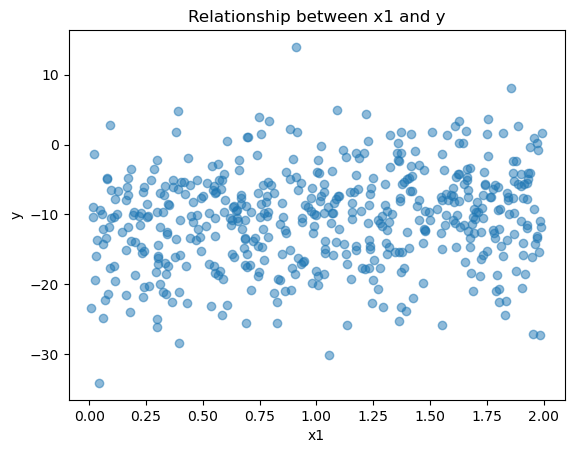

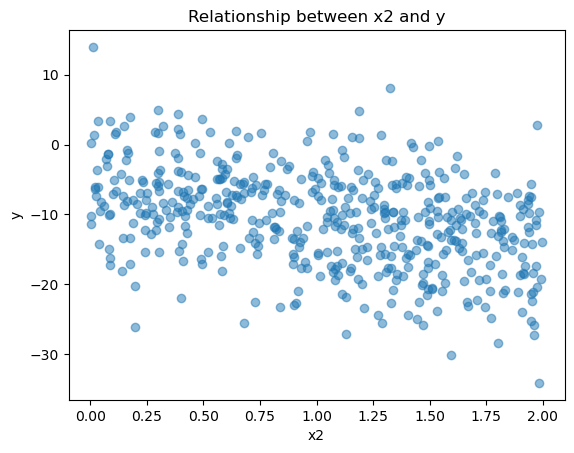

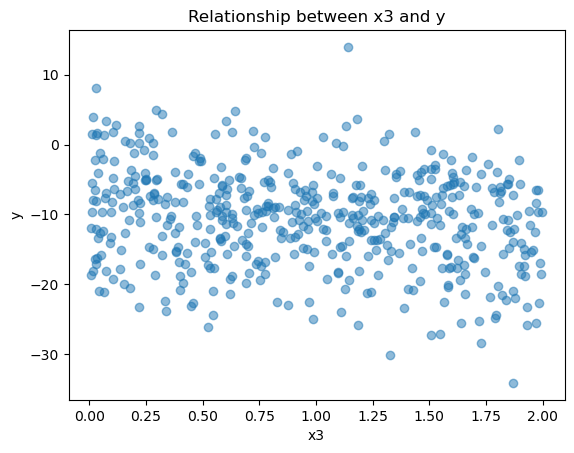

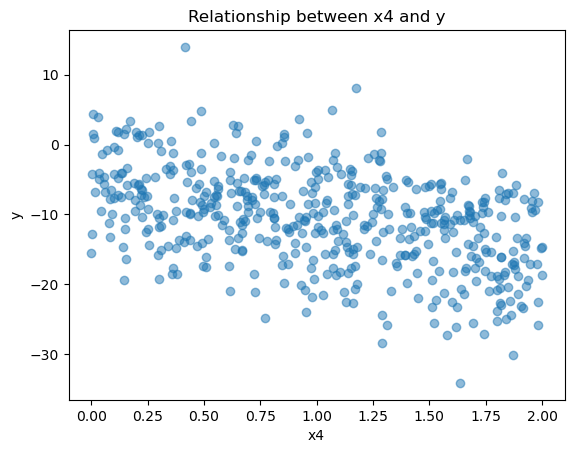

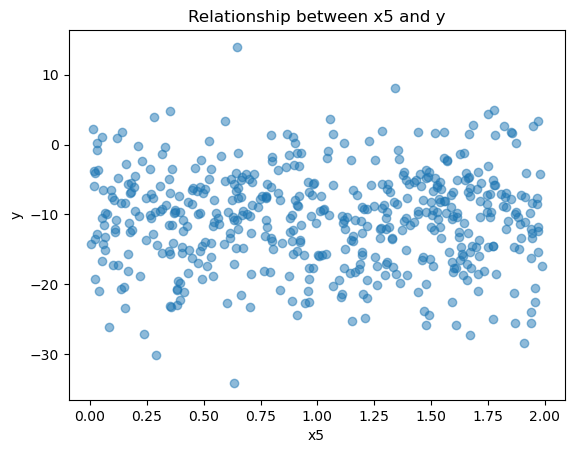

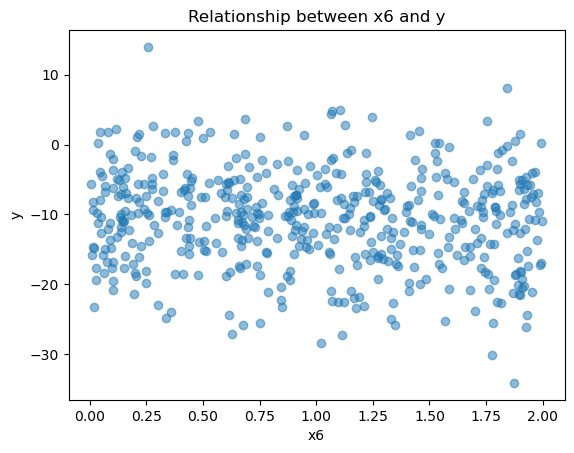

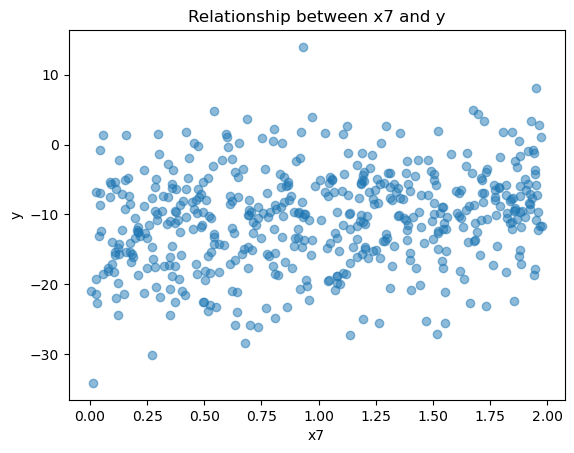

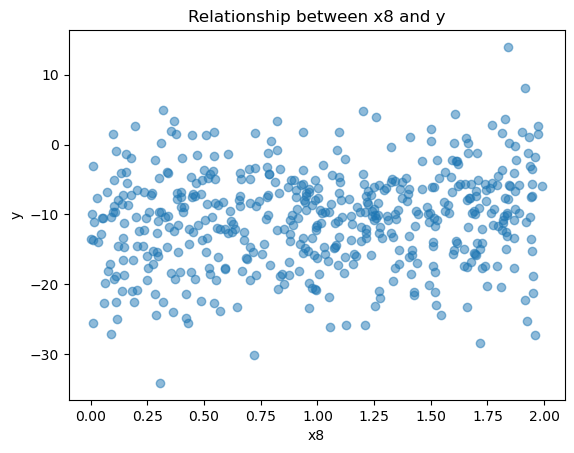

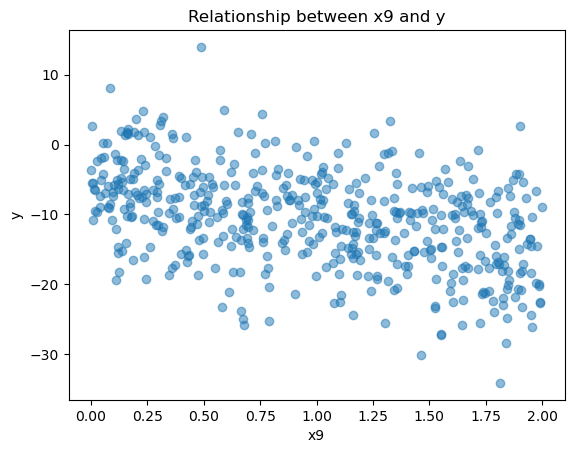

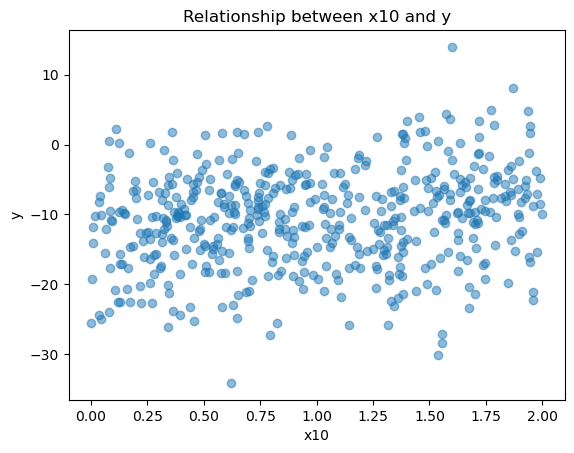

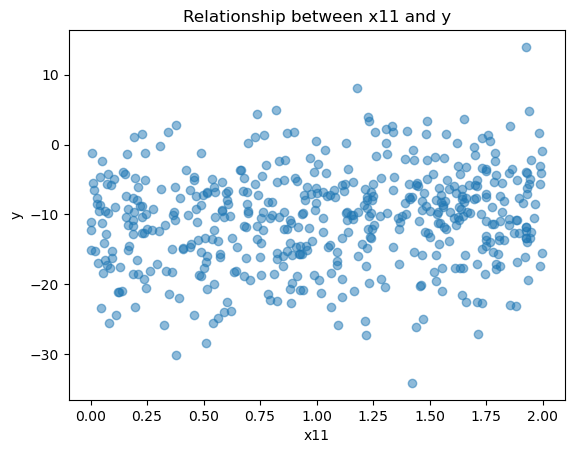

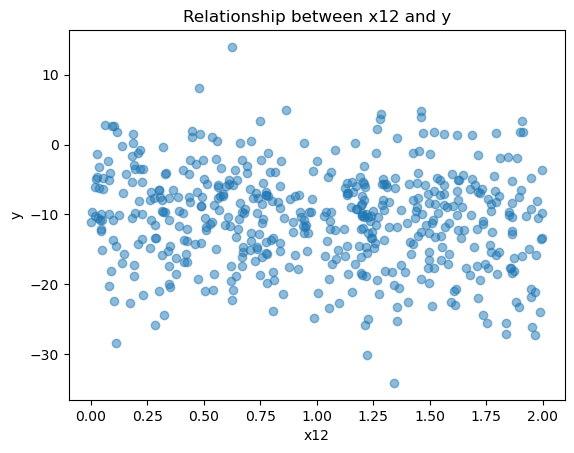

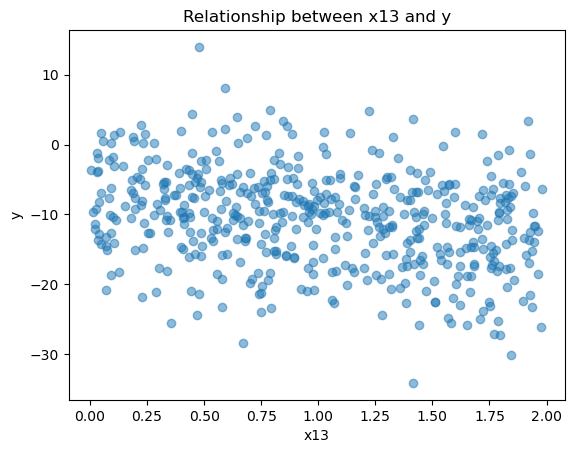

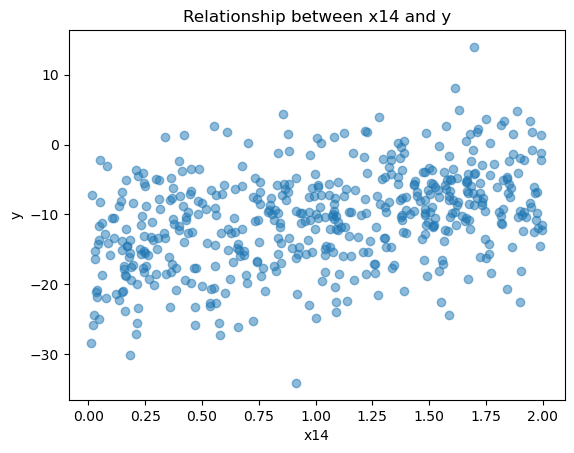

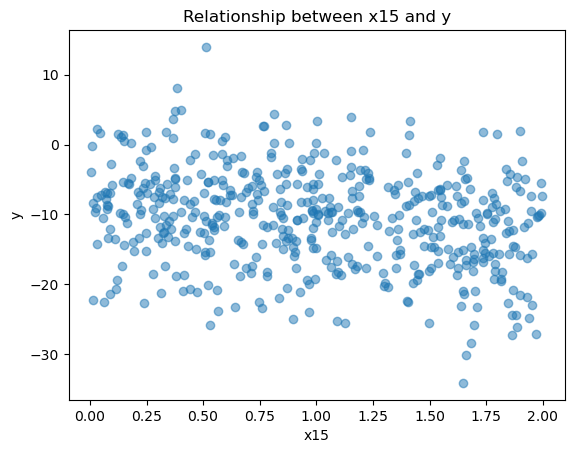

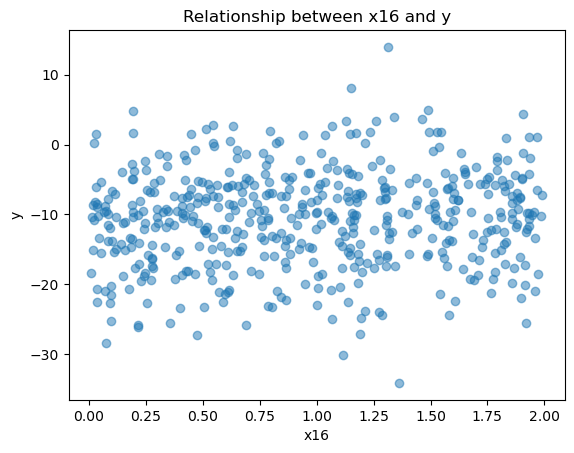

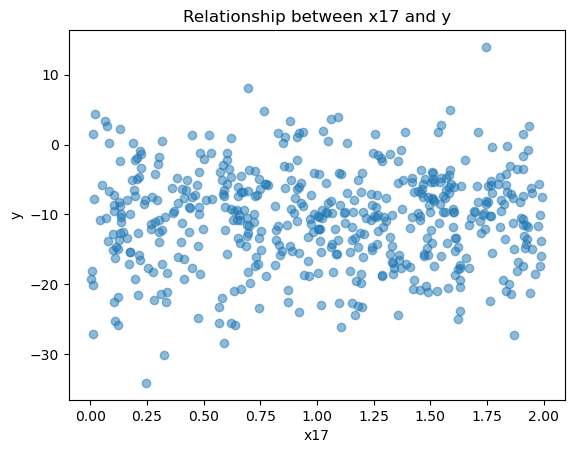

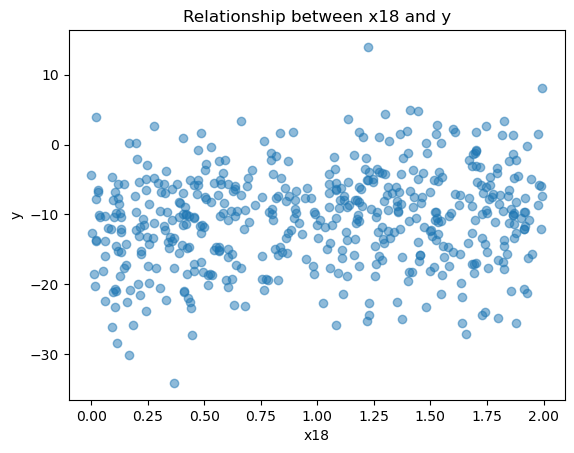

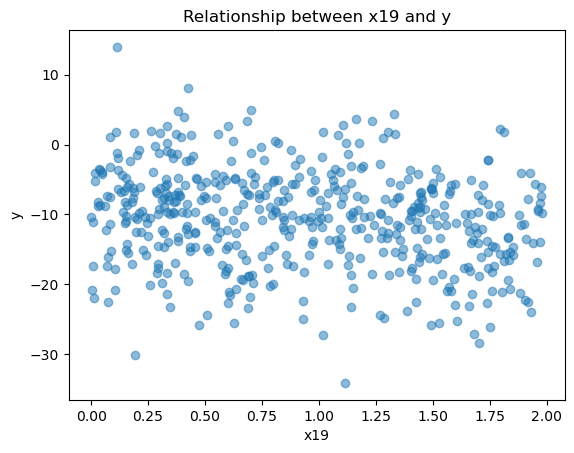

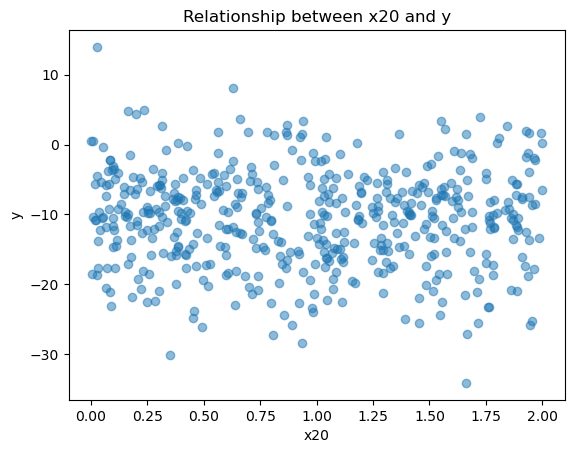

In [62]:
# Read the dataset
dataset = pd.read_csv('dataset.csv')

# Check if the relationship between the features and output is linear
for column in dataset.columns[:-1]:  # Exclude the last column 'y'
    plt.scatter(dataset[column], dataset['y'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('y')
    plt.title(f'Relationship between {column} and y')
    plt.show()

# It's not very obvious that the relationship is linear, since we are plotting the feature against the output calculated with noise, bias and coefficients.
# I could use a linear regression model to fit the data and check but I feel like that's cheating at this point.
# I could also zoom out but that's also cheating as every plot will look linear when zoomed out enough.

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

In [63]:
coeficients = np.random.uniform(-5, 5, 20)

In [64]:
def linear_modeling(data, coeficients, bias):
    return np.dot(data, coeficients) + bias

result = linear_modeling(X, coeficients, 0.5)

# If we were to represent 'b'.... we can simply add it to the coeficients vector as the 0th index, and add a 1 at the beginning of all feature vectors.
# Soo... this will look something like this:
def linear_mdoeling_with_bias(data, coeficients, bias):
    ones = np.ones((data.shape[0], 1)) # Create a column of ones
    new_data = np.hstack((ones, data))  # Add the column of ones to the data
    new_coeficients = np.insert(coeficients, 0, bias) # Insert the bias at the beginning of the coefficients
    return np.dot(new_data, new_coeficients)

y_new = linear_mdoeling_with_bias(X, coeficients, 0.5)
y_new

# The result vectors are the same so the integration worked.

array([-8.98589900e-01,  1.15285236e+01,  8.21024486e+00, -6.46713976e+00,
        7.53369099e+00,  6.41801440e+00,  1.04229462e+01,  2.66110546e+00,
        1.10267220e+01, -6.60940915e-01,  8.44372845e+00,  2.37793270e+01,
        3.78804431e+00, -3.39310318e+00,  7.20476272e-01,  6.28551443e+00,
        3.80065307e+00,  4.23459622e+00,  9.24782647e+00, -1.95736177e+01,
        3.56228759e+00,  4.18870082e+00, -6.90772263e+00, -1.07245970e+01,
        8.95667284e+00, -9.44765581e-01,  1.91018105e+00,  7.06784064e+00,
        8.83463821e+00, -6.99627002e+00,  1.26389081e+00,  1.01724642e+01,
        3.54117856e+00,  2.00460508e+00,  7.29708018e+00,  2.06423227e+01,
        1.56703040e+01,  6.65916744e+00,  1.78933376e+01, -7.11190371e+00,
        4.57827549e+00,  1.65112845e+00,  1.17069623e+01, -1.64435572e+00,
        1.11011773e+01, -3.40612335e+00,  1.17031582e+01, -1.45053681e+01,
        8.92833792e+00, -2.85384257e+00, -4.57420239e+00, -7.29994314e+00,
        1.19524955e+01,  

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

In [79]:
# Calculate the MSE (Mean Squared Error) between the predicted and actual values
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Loss function
J = mean_squared_error(y_new, y)

# Compute the gradients for the coefficients and bias
def compute_gradients(X, y_pred, y_true):
    n = X.shape[0] # Number of samples

    error = y_pred - y_true  # Calculate the error
    
    gradient_coeficients = (2 / n) * np.dot(X.T, error)  # Gradient for coefficients
    gradient_bias = (2 / n) * np.sum(error) # Gradient for bias

    return gradient_coeficients, gradient_bias

grad_coefficients, grad_bias = compute_gradients(X, y_new, y)
grad_coefficients, grad_bias

(array([26.9269404 , 38.81616699, 33.11800658, 35.79387917, 28.31989804,
        29.7766895 , 30.08539445, 32.98856481, 34.28722774, 28.38640961,
        28.09653118, 30.79351495, 35.58790062, 30.52921426, 29.93520175,
        28.6334691 , 34.20047302, 26.33217964, 29.88036679, 28.3782032 ]),
 np.float64(30.727511147268626))

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

In [ ]:
def gradient_descent(X, y, coeficients, bias, learning_rate=0.01, iterations=1000):
    for i in range(iterations):
        # Compute predictions
        y_pred = linear_mdoeling_with_bias(X, coeficients, bias)

        # Calculate the loss
        J = mean_squared_error(y_pred, y)

        # Compute gradients
        grad_coeficients, grad_bias = compute_gradients(X, y_pred, y)

        # Update parameters
        coeficients = coeficients - learning_rate * grad_coeficients
        bias = bias - learning_rate * grad_bias

        if i % 100 == 0:  # Print every 100 iterations
            print(f"Iteration {i}: MSE/Loss = {J}, Coefficients = {coeficients}, Bias = {bias}")

    return coeficients, bias

model_coeficients, model_bias = gradient_descent(X, y, coeficients, bias=0.5, learning_rate=0.01, iterations=1000)
model_coeficients, model_bias

Iteration 0: MSE/Loss = 371.9124410154624, Coefficients = [-4.99299351  4.42353225  1.78251443  1.52953177 -4.36638965 -1.73943936
  1.9210677   3.67442241  0.12876429 -0.78796252 -4.56318784 -0.46606662
  4.2576022   3.99178925 -4.58812456  0.41883321  3.16812941 -3.35543596
 -0.79030393 -1.5715005 ], Bias = 0.19272488852731373
Iteration 100: MSE/Loss = 28.14889011372453, Coefficients = [-1.93232567 -0.67456761 -0.61280049 -1.78978916 -2.3122032  -1.42876375
  1.9551371   2.25956505 -2.71801018  0.41614481 -1.76483166 -0.85903776
  0.59450672  4.32984772 -4.16827238  0.70160133  1.2476299  -0.56794728
 -1.90766967 -1.20756765], Bias = -0.3068616989008941
Iteration 200: MSE/Loss = 6.422928629577749, Coefficients = [-0.48796909 -2.8215262  -1.42406993 -3.16745165 -1.138701   -1.0608978
  1.96352644  1.98775674 -3.67442363  1.31694878 -0.12966923 -0.97626351
 -1.01400708  4.59734489 -3.62289982  0.80920264  0.7105822   0.79915878
 -2.10462654 -1.05149203], Bias = -0.3491700671318732
Iter

array([-4.7237241 ,  4.81169392,  2.1136945 ,  1.88747056, -4.08319067,
       -1.44167246,  2.22192164,  4.00430806,  0.47163657, -0.50409842,
       -4.28222252, -0.15813147,  4.61348121,  4.2970814 , -4.28877254,
        0.7051679 ,  3.51013414, -3.09211416, -0.49150026, -1.28771846])

In [81]:
real_coeficients, real_bias

# As we can see, it's not perfect but it's pretty close, i'm happy with what I have learned so far :D

(array([ 0.47324957, -4.72267092, -2.05734873, -4.58277605, -0.01509319,
        -0.63347581,  1.58955183,  2.14548638, -4.2608128 ,  2.41722545,
         1.69531164, -1.21998112, -2.75613104,  4.65897311, -2.81922501,
         0.54310555,  0.51151561,  1.83332249, -2.00153611, -1.24697815]),
 -0.47573485421848005)

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

In [ ]:
# Using MAE ( Mean Absolute Error )
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def compute_mae_gradients(X, y_true, y_pred):
    n = X.shape[0]  # Number of samples

    error_sign = np.sign(y_pred - y_true).reshape(-1, 1)  # shape (n, 1)

    # Compute gradient
    grad_coefficients = (1 / n) * np.dot(X.T, error_sign).flatten()
    grad_bias = (1 / n) * np.sum(error_sign)

    return grad_coefficients, grad_bias


def gradient_descent_mae(X, y, coeficients, bias, learning_rate=0.01, iterations=1000):
    for i in range(iterations):
        # Compute predictions
        y_pred = linear_mdoeling_with_bias(X, coeficients, bias)

        # Calculate the loss
        J = mean_absolute_error(y, y_pred)

        # Compute gradients
        grad_coeficients, grad_bias = compute_mae_gradients(X, y, y_pred)

        # Update parameters
        coeficients = coeficients - learning_rate * grad_coeficients
        bias = bias - learning_rate * grad_bias

        if i % 100 == 0:  # Print every 100 iterations
            print(f"Iteration {i}: MSE/Loss = {J}, Coefficients = {coeficients}, Bias = {bias}")

    return coeficients, bias

model_coeficients_mae, model_bias_mae = gradient_descent_mae(X, y, coeficients, bias=0.5, learning_rate=0.01, iterations=1000)
model_coeficients_mae, model_bias_mae

Iteration 0: MSE/Loss = 213.42506268184994, Coefficients = [ 5.51634182 15.1057709  11.73776034 12.00681028  6.07821227  8.37831262
 12.12277149 14.02879762 10.23273356  9.24070453  6.06230277  9.79762595
 14.51763872 14.44669248  5.56094829 10.25381577 13.72461181  6.78736763
  8.67309197  8.18548486], Bias = 0.49
Iteration 100: MSE/Loss = 192.50559557819832, Coefficients = [ 4.48229643 14.07289084 10.77144138 10.99047583  5.05322671  7.38918747
 11.12519905 13.02088746  9.25242822  8.25827723  5.01839937  8.79487551
 13.52313081 13.42438595  4.5691863   9.29166871 12.69791817  5.78969469
  7.7510312   7.23042308], Bias = -0.5100000000000006
Iteration 200: MSE/Loss = 171.58612847454663, Coefficients = [ 3.44825104 13.04001078  9.80512243  9.97414137  4.02824115  6.40006232
 10.1276266  12.01297731  8.27212289  7.27584993  3.97449597  7.79212507
 12.5286229  12.40207942  3.57742431  8.32952164 11.67122453  4.79202175
  6.82897043  6.2753613 ], Bias = -1.5100000000000013
Iteration 300: 

(array([-4.52703447,  4.89694479,  2.21341353,  1.9930191 , -3.89694572,
        -1.27930483,  2.36787115,  4.13917653,  0.58142299, -0.33729265,
        -4.08450343, -0.01268118,  4.71804564,  4.45662718, -4.13970564,
         0.85616149,  3.63333658, -2.90891005, -0.36902128, -1.12646867]),
 np.float64(-9.286359999999906))

In [72]:
model_coeficients, model_coeficients_mae
model_bias, model_bias_mae
# They seem to be the same

(np.float64(-0.4149158125196321), np.float64(-0.4149158125196321))

In [93]:
# Using Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_pred - y_true
    is_small_error = np.abs(error) <= delta
    
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

def compute_huber_gradients(X, y_pred, y_true, delta=1.0):
    n = X.shape[0]
    error = y_pred - y_true
    
    grad = np.where(np.abs(error) <= delta, error, delta * np.sign(error))  # shape (n,)
    
    grad_coefficients = (1 / n) * np.dot(X.T, grad)  # shape (features,)
    grad_bias = (1 / n) * np.sum(grad)             # scalar
    
    return grad_coefficients, grad_bias

def gradient_descent_huber(X, y, coefficients, bias, learning_rate=0.01, iterations=1000, delta=1.0):
    for i in range(iterations):
        # Predict
        y_pred = linear_mdoeling_with_bias(X, coefficients, bias)
        
        # Calculate Huber loss
        loss = huber_loss(y, y_pred, delta)
        
        # Compute Huber gradients
        grad_coefficients, grad_bias = compute_huber_gradients(X, y, y_pred, delta)
        
        # Update parameters
        coefficients -= learning_rate * grad_coefficients
        bias -= learning_rate * grad_bias
        
        if i % 100 == 0:
            print(f"Iteration {i}: Huber Loss = {loss:.6f}, Coefficients = {coefficients}, Bias = {bias:.4f}")
    
    return coefficients, bias


model_coeficients_huber, model_bias_huber = gradient_descent_huber(X, y, coeficients, bias=0.5, learning_rate=0.001, iterations=1000)
model_coeficients_huber, model_bias_huber

Iteration 0: Huber Loss = 412.119734, Coefficients = [15.86817024 25.44593317 21.41157941 22.18133449 16.33934267 18.2804445
 22.10946925 24.11898621 20.04657026 19.0757842  16.51281973 19.83616058
 24.47365742 24.68100317 15.48947759 19.88587005 24.00284182 16.77507143
 17.90384235 17.74660837], Bias = 0.5010
Iteration 100: Huber Loss = 414.211680, Coefficients = [15.97157478 25.54922117 21.50821131 22.28296794 16.44184123 18.37935701
 22.20922649 24.21977722 20.14460079 19.17402693 16.61721007 19.93643562
 24.57310821 24.78323383 15.58865379 19.98208476 24.10551118 16.87483873
 17.99604843 17.84211454], Bias = 0.6010
Iteration 200: Huber Loss = 416.303627, Coefficients = [16.07497932 25.65250918 21.6048432  22.38460138 16.54433979 18.47826953
 22.30898374 24.32056824 20.24263133 19.27226966 16.72160041 20.03671066
 24.672559   24.88546448 15.68782999 20.07829946 24.20818055 16.97460602
 18.0882545  17.93762072], Bias = 0.7010
Iteration 300: Huber Loss = 418.395574, Coefficients = [16

(array([16.90118159, 26.47778034, 22.37693205, 23.19665261, 17.36330325,
        19.26858052, 23.10604412, 25.12588845, 21.02589529, 20.05722907,
        17.55567923, 20.83790826, 25.46717082, 25.7022874 , 16.48024782,
        20.84705497, 25.02850876, 17.7717467 , 18.82498106, 18.70071509]),
 np.float64(1.4999999999999454))

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1 + \exp\left(-\sum_{i=1}^{m} a_i x_i + b\right)} $$
Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?